# Trabalho 1 (T1)
------
O trabalho 1 consiste em explorar um conjunto de dados de doenças cardíacas (arquivo `heart.csv`). O trabalho deve ser relizado em **duplas**.


O conjunto de dados de doenças cardíacas é formado por 302 observações (instâncias) e contém o seguintes atributos (todos numéricos):
- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0 (0 = no presense of heard disease; 1 = presence of heart disease)

Nas células abaixo deste notebook existem questões específicas sobre o conjunto de dados que devem ser respondidas.

**Não é permitido importar nenhum módulo além dos que estão importados na célula abaixo!!**

------

### Entrega

Após responder todas as questões, vocês devem certificar que seu jupyter notebook está salvo com suas alterações (basta pressionar `ctrl + s` para salvar). Após salvar suas alterações, vocês devem realizar a entrega na sala de entrega do moodle. A entrega deve ser feita da seguinte maneira:
- Deve ser entregue um arquivo `zip` contendo este jupyter notebook (Trabalho_1.ipynb) com as questões respondidas. O nome do arquivo deve seguir o padrão: `NomeSobrenome_NomeSobrenome.zip`

**Apenas um aluno da dupla deve fazer a entrega!!**

------

### Critérios de avaliação

Cada questão será avaliada de acordo com os seguintes critérios:

- Resolver o problema proposto: 70%
- Utilizar código vetorizado: 20%
- Escrever código simples e legível: 10%

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

## Questão 1 (3,0 pts)

Você deve ler o arquivo `heart.csv` e imprimir os seguintes dados sobre cada atributo **(exceto o atributo alvo/target)**:
- Valor mínimo e máximo de cada atributo.
- Valor médio de cada atributo.
- Desvio padrão de cada atributo.
- Mediana de cada atributo.

In [10]:
########################
# Inicio do seu codigo #
########################
valores = np.loadtxt('heart.csv', delimiter=',', skiprows=1)

header = None
dataset = []

with open('heart.csv', 'r') as f:
    arquivo_csv = csv.reader(f, delimiter=',', quotechar='"')
    for i, row in enumerate(arquivo_csv):
        if i == 0:
            header = row
            for col_name in header:
                dataset.append(col_name)

# Valor mínimo e máximo de cada atributo.
minimo = np.min(valores[:,:-1], axis=0)
maximo = np.max(valores[:,:-1], axis=0)
x=0
for k in dataset:
    if k == 'target': continue
    print (k,"--> mínimo:", minimo[x],"máximo:", maximo[x])
    x += 1

# Valor médio.
medio = np.mean(valores[:,:-1], axis=0)
print()
x=0
for k in dataset:
    if k == 'target': continue
    print (k,"--> valor médio:", medio[x])
    x += 1

# Desvio Padrão.
desvio = np.std(valores[:,:-1], axis=0)
print()
x=0
for k in dataset:
    if k == 'target': continue
    print (k,"--> desvio:", desvio[x])
    x += 1

#Mediana
indice = np.argsort(valores[:,:-1], axis=0)
indice_mediana = indice.shape[0]//2
mediana = indice[indice_mediana]

print()
x=0
for k in dataset:
    if k == 'target': continue
    print (k,"--> mediana:", valores[:,x][mediana[x]])
    x += 1

########################
#   Fim do seu codigo  #
########################

age --> mínimo: 29.0 máximo: 77.0
sex --> mínimo: 0.0 máximo: 1.0
cp --> mínimo: 0.0 máximo: 3.0
trestbps --> mínimo: 94.0 máximo: 200.0
chol --> mínimo: 126.0 máximo: 564.0
fbs --> mínimo: 0.0 máximo: 1.0
restecg --> mínimo: 0.0 máximo: 2.0
thalach --> mínimo: 71.0 máximo: 202.0
exang --> mínimo: 0.0 máximo: 1.0
oldpeak --> mínimo: 0.0 máximo: 6.2
slope --> mínimo: 0.0 máximo: 2.0
ca --> mínimo: 0.0 máximo: 4.0
thal --> mínimo: 0.0 máximo: 3.0

age --> valor médio: 54.366336633663366
sex --> valor médio: 0.6831683168316832
cp --> valor médio: 0.966996699669967
trestbps --> valor médio: 131.62376237623764
chol --> valor médio: 246.26402640264027
fbs --> valor médio: 0.1485148514851485
restecg --> valor médio: 0.528052805280528
thalach --> valor médio: 149.64686468646866
exang --> valor médio: 0.32673267326732675
oldpeak --> valor médio: 1.0396039603960396
slope --> valor médio: 1.3993399339933994
ca --> valor médio: 0.7293729372937293
thal --> valor médio: 2.3135313531353137

age --> d

## Questão 2 (3,0 pts)

Você deve realizar as seguintes operações sobre os atributos idade (age) e colesterol (chol):
1. Plotar um gráfico de dispersão com o atributo colesterol no eixo X e a idade no eixo Y. Utilize o atributo target para colorir os pontos de acordo com a sua classe.
2. Normalize os atributos idade (age) e colesterol (chol) utilizando a estratégia MinMax. A normalização MinMax reescala os valores do atributo de modo que o maior valor passe a ser 1 e o menor valor passe a ser 0. A normalização MinMax é dada pela fórmula abaixo:
$$x^{(i)}_{norm}=\frac{x^{(i)} - \min(x^{(i)})}{\max(x^{(i)}) - \min(x^{(i)})}$$

Onde $x^{(i)}_{norm}$ é o atributo $x^{(i)}$ do conjunto de dados normalizado.

3. Após normalizar os atributos, faça a plotagem do passo 1 novamente, agora com os atributos normalizados.

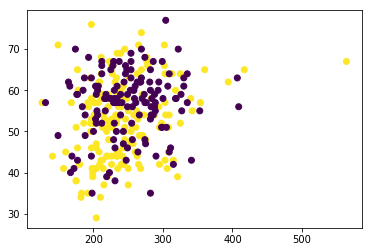

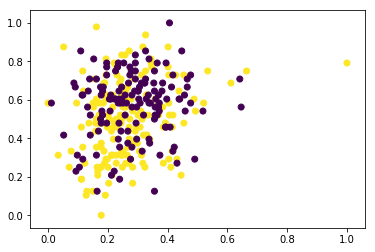

In [11]:
########################
# Inicio do seu codigo #
########################
age = valores[:,0]
colesterol = valores[:,4]
target = valores[:,-1]
plt.scatter(colesterol, age, c=target)
plt.show()

#Normalização
age_minmax = (age - age.min())/(age.max() - age.min())
colesterol_minmax = (colesterol - colesterol.min())/(colesterol.max() - colesterol.min())
plt.scatter(colesterol_minmax, age_minmax, c=target)
plt.show()
########################
#   Fim do seu codigo  #
########################

## Questão 3 (2,0 pts)

Responda as perguntas abaixo sobre o conjunto de dados:

1. Quantas das pessoas do conjunto de dados apresentam doença no coração?
2. Quantas mulheres apresentam doença no coração?
3. Quantos homens apresentam doença no coração?
4. Quantos homens tem dores no peito (`cp`) do tipo 2 ou do tipo 3?


In [12]:
########################
# Inicio do seu codigo #
########################
target = valores[:,-1]
print ("Quantidade de pessoas com problema no coração:", target.sum())
print ("Quantidade de mulheres com problema no coração:", np.sum([(valores[:,1] == 0) & (valores[:,-1] ==1)]))
print ("Quantidade de homens com problema no coração:", np.sum([(valores[:,1] == 1) & (valores[:,-1] ==1)]))
dores = np.sum([(valores[:,1] == 1) & ((valores[:,2] ==2)|(valores[:,2] ==3))])
print ("Quantidade de homens que tem dores no peito tipo 2 ou 3:", dores)


########################
#   Fim do seu codigo  #
########################

Quantidade de pessoas com problema no coração: 165.0
Quantidade de mulheres com problema no coração: 72
Quantidade de homens com problema no coração: 93
Quantidade de homens que tem dores no peito tipo 2 ou 3: 71


## Questão 4 (2,0 pts)

Faça dois gráficos que pizza (*pie chart*) que contêm os tipos de dores no peito (`cp`). Mostre o tipo da dor (0, 1, 2, 3) e a frequência de cada uma delas. Faça um plot para homens e outro para mulheres.

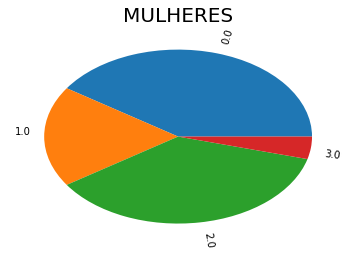

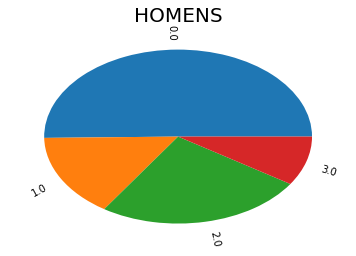

In [13]:
########################
# Inicio do seu codigo #
########################
mascara_homem = valores[:,1] == 1
mascara_mulher = valores[:,1] == 0
dor_peito = valores[:,2]
# MULHERES
tipo_dor_0, freq_0 = np.unique(dor_peito[mascara_mulher], return_counts=True)

plt.pie(freq_0, labels=tipo_dor_0, rotatelabels=True)
plt.title('MULHERES', fontdict={'fontsize': 20})
plt.show()
# HOMENS
tipo_dor_1, freq_1 = np.unique(dor_peito[mascara_homem], return_counts=True)
plt.pie(freq_1, labels=tipo_dor_1, rotatelabels=True)
plt.title('HOMENS', fontdict={'fontsize': 20})
plt.show()
########################
#   Fim do seu codigo  #
########################